In [110]:
import scanpy as sc
import numpy as np

def find_differentially_expressed_genes(adata, pval_threshold=0.0001, logfc_threshold=0.5):
    """
    Find differentially expressed genes for each cell type in the AnnData object.
    
    Parameters:
    adata (AnnData): Annotated data matrix.
    pval_threshold (float): p-value threshold to consider a gene as differentially expressed.
    logfc_threshold (float): Log fold change threshold to consider a gene as differentially expressed.
    
    Returns:
    dict: A dictionary with cell types as keys and lists of differentially expressed genes as values.
    """
    
    # Dictionary to hold differential expression results
    differential_expression_results = {}

    # Get unique cell types
    cell_types = adata.obs['cell_type'].unique()

    # Perform differential expression analysis for each cell type
    sc.tl.rank_genes_groups(adata, groupby='cell_type', method='t-test')
    
    # Extract the list of differentially expressed genes for each cell type
    for cell_type in cell_types:
        de_genes = []
        gene_names = adata.uns['rank_genes_groups']['names'][cell_type]
        pvals = adata.uns['rank_genes_groups']['pvals'][cell_type]
        logfc = adata.uns['rank_genes_groups']['logfoldchanges'][cell_type]
        
        for gene, pval, lfc in zip(gene_names, pvals, logfc):
            if pval < pval_threshold and abs(lfc) > logfc_threshold:
                de_genes.append(gene)
        
        differential_expression_results[cell_type] = de_genes

    return differential_expression_results

# Example usage
# adata = sc.read_h5ad('your_data_file.h5ad')
# diff_expr_genes = find_differentially_expressed_genes(adata)
# print(diff_expr_genes)


In [172]:
def find_marker_genes(adata, group):
    sc.tl.rank_genes_groups(adata, group, method="t-test")
    sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
    return pd.DataFrame(adata.uns["rank_genes_groups"]["names"])

In [173]:
from copy import deepcopy
from interpretable_ssl.datasets.immune import *

ds = ImmuneDataset()
ds = ImmuneDataset()
adata = deepcopy(ds.adata)

loading data


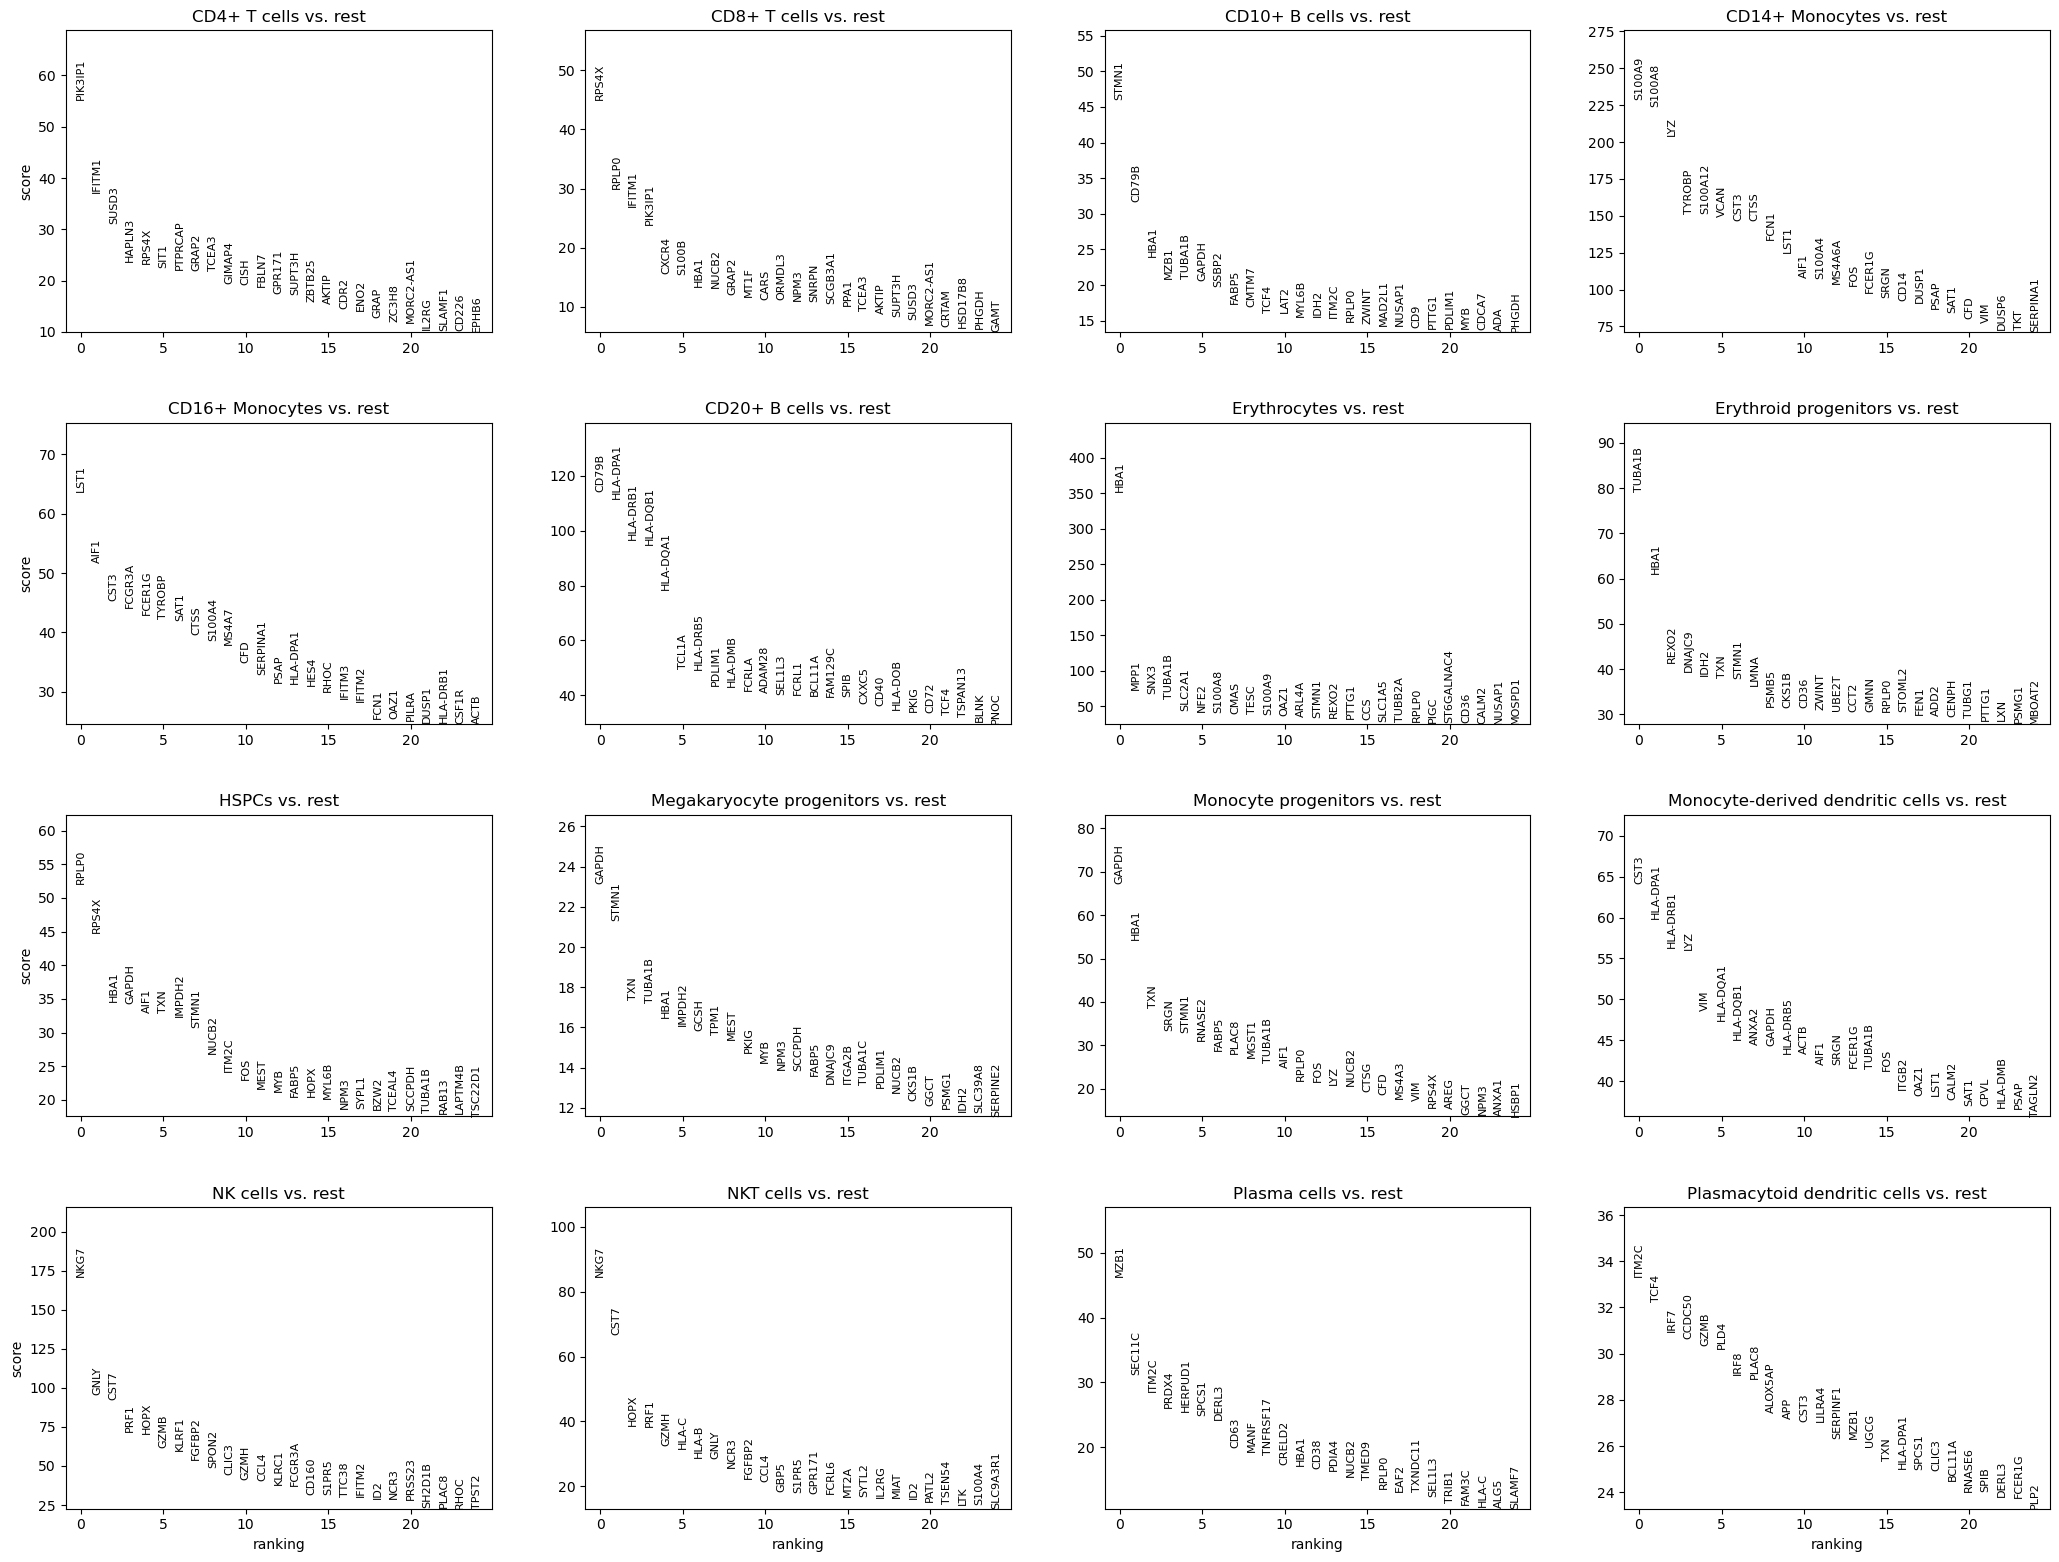

In [176]:
df = find_marker_genes(adata, 'cell_type')

In [177]:
df.head(5)

,CD4+ T cells,CD8+ T cells,CD10+ B cells,CD14+ Monocytes,CD16+ Monocytes,CD20+ B cells,Erythrocytes,Erythroid progenitors,HSPCs,Megakaryocyte progenitors,Monocyte progenitors,Monocyte-derived dendritic cells,NK cells,NKT cells,Plasma cells,Plasmacytoid dendritic cells
0,PIK3IP1,RPS4X,STMN1,S100A9,LST1,CD79B,HBA1,TUBA1B,RPLP0,GAPDH,GAPDH,CST3,NKG7,NKG7,MZB1,ITM2C
1,IFITM1,RPLP0,CD79B,S100A8,AIF1,HLA-DPA1,MPP1,HBA1,RPS4X,STMN1,HBA1,HLA-DPA1,GNLY,CST7,SEC11C,TCF4
2,SUSD3,IFITM1,HBA1,LYZ,CST3,HLA-DRB1,SNX3,REXO2,HBA1,TXN,TXN,HLA-DRB1,CST7,HOPX,ITM2C,IRF7
3,HAPLN3,PIK3IP1,MZB1,TYROBP,FCGR3A,HLA-DQB1,TUBA1B,DNAJC9,GAPDH,TUBA1B,SRGN,LYZ,PRF1,PRF1,PRDX4,CCDC50
4,RPS4X,CXCR4,TUBA1B,S100A12,FCER1G,HLA-DQA1,SLC2A1,IDH2,AIF1,HBA1,STMN1,VIM,HOPX,GZMH,HERPUD1,GZMB
